In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.inspection import permutation_importance

ModuleNotFoundError: No module named 'sklearn.inspection'

In [33]:
df = pd.read_csv("../data/Tetuan.csv")
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [34]:
df_original = df
df_original = df_original.drop(['DateTime'],axis=1)

In [35]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
DateTime                     52416 non-null object
Temperature                  52416 non-null float64
Humidity                     52416 non-null float64
Wind Speed                   52416 non-null float64
general diffuse flows        52416 non-null float64
diffuse flows                52416 non-null float64
Zone 1 Power Consumption     52416 non-null float64
Zone 2  Power Consumption    52416 non-null float64
Zone 3  Power Consumption    52416 non-null float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [37]:
df.isna().sum().sum() # There is NO Null Values

0

In [38]:
df['DateTime'] = pd.to_datetime(df['DateTime']) 

In [39]:
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Day of Week'] = df['DateTime'].dt.dayofweek + 1

In [40]:
def month_to_quarter(series):
    if series['Month'] <=3:
        return 1
    elif series['Month'] >3 and series['Month'] <=6:
        return 2
    elif series['Month'] >6 and series['Month'] <=9:
        return 3
    elif series['Month'] >9 and series['Month'] <=12:
        return 4

In [41]:
df['Quarter of Year'] = df.apply(month_to_quarter, axis='columns')

In [42]:
df['Day of Year'] = df['DateTime'].dt.strftime('%j').astype(int)  

In [43]:
df = df.drop(['DateTime'],axis=1)

In [44]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year'],
      dtype='object')

In [45]:
df = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year','Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

In [46]:
df.to_csv('../data/Tetuan_modified.csv',index=False)

## Exploratory data Analysis

In [47]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Day,Month,Hour,Minute,Day of Week,Quarter of Year,Day of Year,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,1,1,0,0,7,1,1,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,1,1,0,10,7,1,1,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,1,1,0,20,7,1,1,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,1,1,0,30,7,1,1,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,1,1,0,40,7,1,1,27335.69620,17872.34043,18442.40964


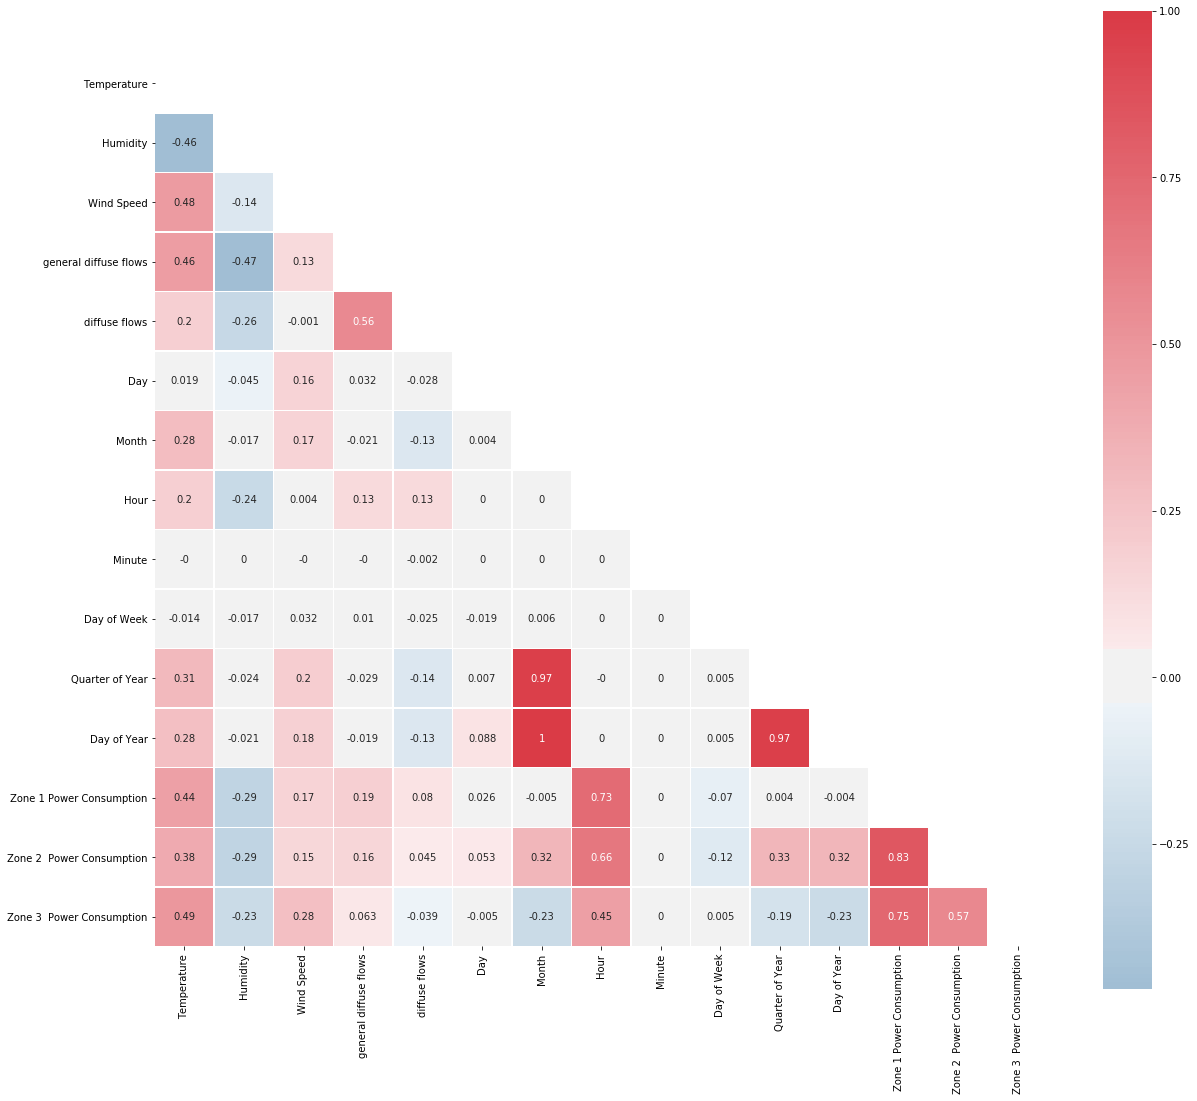

In [48]:
# Preprocessed Dataset
corr = df.corr().round(decimals=3)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

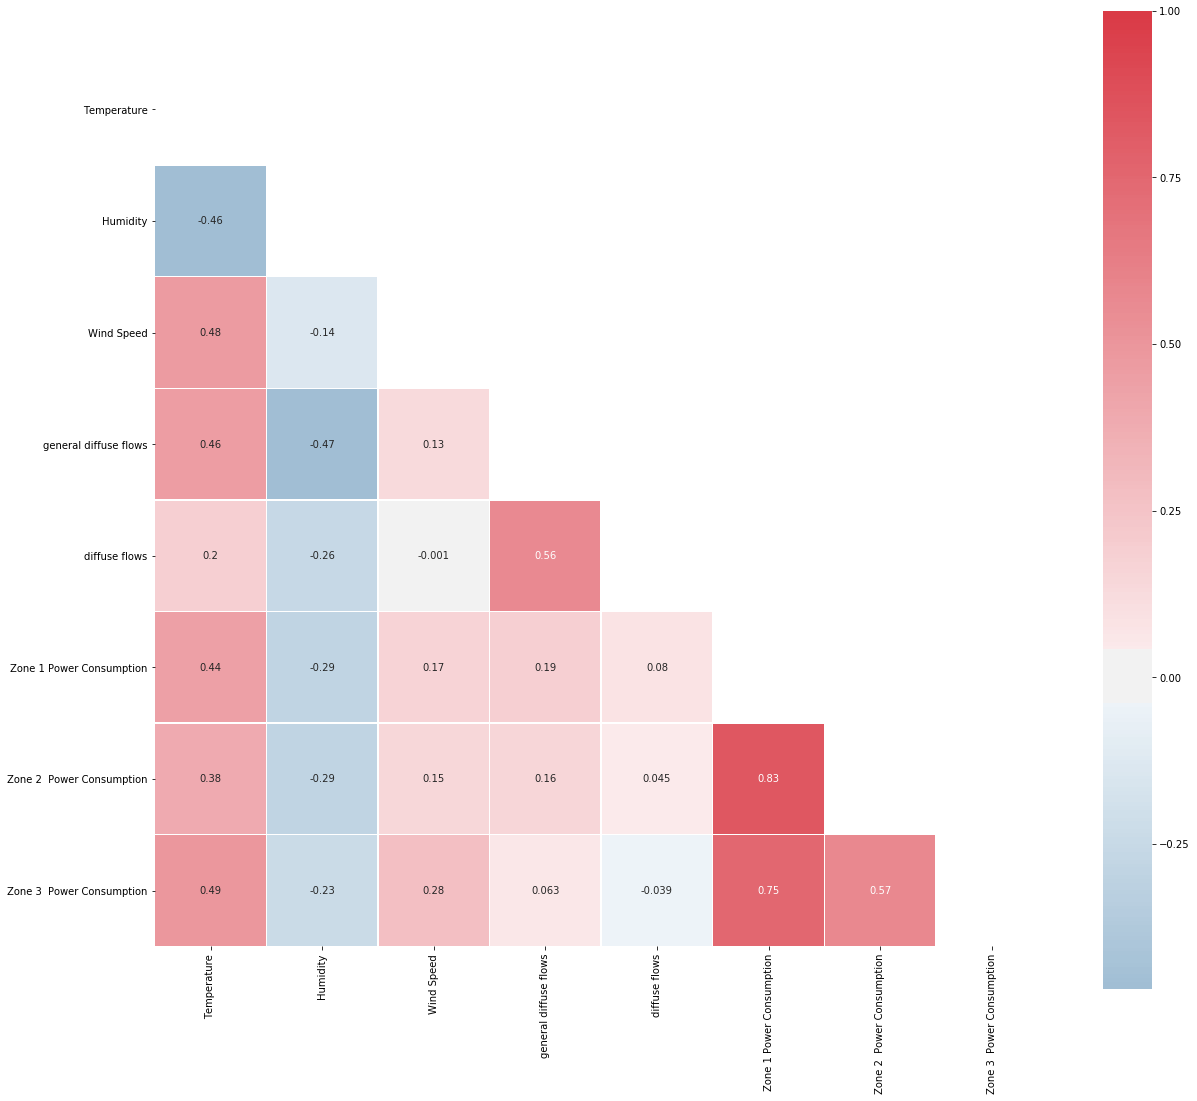

In [49]:
# Original Dataset
corr = df_original.corr().round(decimals=3)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [50]:
y= df[['Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

X = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Day',
       'Month', 'Hour', 'Minute', 'Day of Week', 'Quarter of Year',
       'Day of Year']]

In [51]:
# load and summarize the dataset
# Using Zone-1 as target for feature selection because it has highest corr to other panels 

from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [52]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression

bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X_train,y_train['Zone 1 Power Consumption'])
pd.DataFrame({'Column':X_train.columns,'Score':fit.scores_})

,Column,Score
0,Temperature,8421.421844
1,Humidity,3143.099921
2,Wind Speed,1037.358988
3,general diffuse flows,1292.913918
4,diffuse flows,221.069095
5,Day,37.296279
6,Month,0.904901
7,Hour,38770.744717
8,Minute,0.548721
9,Day of Week,187.832539


In [ ]:


start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

def calcuate_model_performance(y_pred,y_actual,model_name):
    
    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = sqrt(mean_squared_error(y_actual, y_pred))
    r2 = r2_score(y_actual, y_pred)
    #pd.DataFrame
